investigate the factors that influence the online customers repeat purchase intention. 

In [1]:
# importing all libardies

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
#loading dataframe
df=pd.read_excel(r"E:\datascience\assignment by filprobo\Customer_retention_dataset\customer_retention_dataset.xlsx")
df

,1Gender of respondent,2 How old are you?,3 Which city do you shop online from?,4 What is the Pin Code of where you shop online from?,5 Since How Long You are Shopping Online ?,6 How many times you have made an online purchase in the past 1 year?,7 How do you access the internet while shopping on-line?,8 Which device do you use to access the online shopping?,9 What is the screen size of your mobile device?\t\t\t\t\t\t,10 What is the operating system (OS) of your device?\t\t\t\t,...,"Longer time to get logged in (promotion, sales period)","Longer time in displaying graphics and photos (promotion, sales period)","Late declaration of price (promotion, sales period)","Longer page loading time (promotion, sales period)","Limited mode of payment on most products (promotion, sales period)",Longer delivery period,Change in website/Application design,Frequent disruption when moving from one page to another,Website is as efficient as before,Which of the Indian online retailer would you recommend to a friend?
0,Male,31-40 years,Delhi,110009,Above 4 years,31-40 times,Dial-up,Desktop,Others,Window/windows Mobile,...,Amazon.in,Amazon.in,Flipkart.com,Flipkart.com,Amazon.in,Paytm.com,Flipkart.com,Amazon.in,Amazon.in,Flipkart.com
1,Female,21-30 years,Delhi,110030,Above 4 years,41 times and above,Wi-Fi,Smartphone,4.7 inches,IOS/Mac,...,"Amazon.in, Flipkart.com",Myntra.com,snapdeal.com,Snapdeal.com,Snapdeal.com,Snapdeal.com,Amazon.in,Myntra.com,"Amazon.in, Flipkart.com","Amazon.in, Myntra.com"
2,Female,21-30 years,Greater Noida,201308,3-4 years,41 times and above,Mobile Internet,Smartphone,5.5 inches,Android,...,Myntra.com,Myntra.com,Myntra.com,Myntra.com,Amazon.in,Paytm.com,Paytm.com,Paytm.com,Amazon.in,"Amazon.in, Paytm.com, Myntra.com"
3,Male,21-30 years,Karnal,132001,3-4 years,Less than 10 times,Mobile Internet,Smartphone,5.5 inches,IOS/Mac,...,Snapdeal.com,"Myntra.com, Snapdeal.com",Myntra.com,Paytm.com,Paytm.com,Paytm.com,"Amazon.in, Flipkart.com","Amazon.in, Flipkart.com","Amazon.in, Flipkart.com, Paytm.com","Amazon.in, Flipkart.com"
4,Female,21-30 years,Bangalore,530068,2-3 years,11-20 times,Wi-Fi,Smartphone,4.7 inches,IOS/Mac,...,"Flipkart.com, Paytm.com",Paytm.com,Paytm.com,Paytm.com,Snapdeal.com,Paytm.com,Amazon.in,Snapdeal.com,Paytm.com,"Amazon.in, Myntra.com"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264,Female,21-30 years,Solan,173212,1-2 years,Less than 10 times,Mobile Internet,Smartphone,5.5 inches,Android,...,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in
265,Female,31-40 years,Ghaziabad,201008,1-2 years,31-40 times,Mobile Internet,Smartphone,Others,Android,...,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com
266,Female,41-50 yaers,Bangalore,560010,2-3 years,Less than 10 times,Mobile internet,Laptop,Others,Window/windows Mobile,...,Amazon.in,Snapdeal.com,Amazon.in,Snapdeal.com,Snapdeal.com,Snapdeal.com,Snapdeal.com,Snapdeal.com,Amazon.in,Amazon.in
267,Female,Less than 20 years,Solan,173229,2-3 years,Less than 10 times,Wi-Fi,Smartphone,5.5 inches,Android,...,Amazon.in,"Amazon.in, Myntra.com, Snapdeal.com",Amazon.in,"Amazon.in, Snapdeal.com",Amazon.in,Amazon.in,Amazon.in,"Myntra.com, Snapdeal.com","Myntra.com, Snapdeal.com",Amazon.in


In [3]:
## Transposing the data frame
df.head().T

,0,1,2,3,4
1Gender of respondent,Male,Female,Female,Male,Female
2 How old are you?,31-40 years,21-30 years,21-30 years,21-30 years,21-30 years
3 Which city do you shop online from?,Delhi,Delhi,Greater Noida,Karnal,Bangalore
4 What is the Pin Code of where you shop online from?,110009,110030,201308,132001,530068
5 Since How Long You are Shopping Online ?,Above 4 years,Above 4 years,3-4 years,3-4 years,2-3 years
...,...,...,...,...,...
Longer delivery period,Paytm.com,Snapdeal.com,Paytm.com,Paytm.com,Paytm.com
Change in website/Application design,Flipkart.com,Amazon.in,Paytm.com,"Amazon.in, Flipkart.com",Amazon.in
Frequent disruption when moving from one page to another,Amazon.in,Myntra.com,Paytm.com,"Amazon.in, Flipkart.com",Snapdeal.com
Website is as efficient as before,Amazon.in,"Amazon.in, Flipkart.com",Amazon.in,"Amazon.in, Flipkart.com, Paytm.com",Paytm.com


In [21]:
#checkig cloumns
df.columns

Index(['1Gender of respondent', '2 How old are you? ',
       '3 Which city do you shop online from?',
       '4 What is the Pin Code of where you shop online from?',
       '5 Since How Long You are Shopping Online ?',
       '6 How many times you have made an online purchase in the past 1 year?',
       '7 How do you access the internet while shopping on-line?',
       '8 Which device do you use to access the online shopping?',
       '9 What is the screen size of your mobile device?\t\t\t\t\t\t                                        ',
       '10 What is the operating system (OS) of your device?\t\t\t\t                                          ',
       '11 What browser do you run on your device to access the website?\t\t\t                                                          ',
       '12 Which channel did you follow to arrive at your favorite online store for the first time?                                                                   ',
       '13 After first visit, how 

In [6]:
#removing unwanted space & unused input load with the file
df.columns = df.columns.str.replace('\t', '')
df.columns = df.columns.str.replace('  ', ' ')
df.columns

Index(['Gender', 'Age', 'City', 'Pincode', 'Shopping_Since', 'Frequency',
       'internet Accesibility', 'device',
       '9 What is the screen size of your mobile device?          ',
       '10 What is the operating system (OS) of your device?           ',
       '11 What browser do you run on your device to access the website?               ',
       '12 Which channel did you follow to arrive at your favorite online store for the first time?                 ',
       '13 After first visit, how do you reach the online retail store?             ',
       '14 How much time do you explore the e- retail store before making a purchase decision?                 ',
       '15 What is your preferred payment Option?                                ',
       '16 How frequently do you abandon (selecting an items and leaving without making payment) your shopping cart?             ',
       '17 Why did you abandon the “Bag”, “Shopping Cart”?                                      ',
       'Easily R

In [7]:
df = df.rename(columns = {'1Gender of respondent' :'Gender',
                          '2 How old are you? ': 'Age',
                          '3 Which city do you shop online from?' : 'City',
                          '4 What is the Pin Code of where you shop online from?': 'Pincode',
                          '5 Since How Long You are Shopping Online ?' :'Shopping_Since',
                          '6 How many times you have made an online purchase in the past 1 year?' :'Frequency',
                          '7 How do you access the internet while shopping on-line?' :'internet Accesibility',
                          '8 Which device do you use to access the online shopping?' :'device',
                          '9 What is the screen size of your mobile device?          ' : 'mobile Screen',
                          '10 What is the operating system (OS) of your device?           ' : 'os',
                          '11 What browser do you run on your device to access the website?               ' : 'Browser',
                          '12 Which channel did you follow to arrive at your favorite online store for the first time?                 ': 'channel/path',
                          '13 After first visit, how do you reach the online retail store?             ' : 'Second Visit Channels',
                          '15 What is your preferred payment Option?                                ' : 'Payment Method',
                          '14 How much time do you explore the e- retail store before making a purchase decision?                 ': 'decision Making time',
                          '16 How frequently do you abandon (selecting an items and leaving without making payment) your shopping cart?             ' : 'Frequency of Abandon',
                          '17 Why did you abandon the “Bag”, “Shopping Cart”?                                      ' : 'Reason of Abandon',
                          '18 The content on the website must be easy to read and understand' : 'Easily Readable?',
                          '19 Information on similar product to the one highlighted is important for product comparison' : 'Product info poll',
                          '20 Complete information on listed seller and product being offered is important for purchase decision.': 'Complete info Poll',
                          '21 All relevant information on listed products must be stated clearly' : 'relevant information poll',
                          '22 Ease of navigation in website':'website Navigation poll',
                          '23 Loading and processing speed' : 'Loading time poll',
                          '24 User friendly Interface of the website':'website interface poll',
                          '25 Convenient Payment methods': 'easy payment poll',
                          '26 Trust that the online retail store will fulfill its part of the transaction at the stipulated time':'Trust on transaction timing poll',
                          '27 Empathy (readiness to assist with queries) towards the customers':'assitance poll',
                          '28 Being able to guarantee the privacy of the customer': 'data security poll',
                          '29 Responsiveness, availability of several communication channels (email, online rep, twitter, phone etc.)': 'communication channels poll',
                          '30 Online shopping gives monetary benefit and discounts': 'Discounts & banefit poll',
                          '31 Enjoyment is derived from shopping online':'enjoyment poll',
                          '32 Shopping online is convenient and flexible':'convenient and flexible poll',
                          '33 Return and replacement policy of the e-tailer is important for purchase decision': 'Return & replacement poll',
                          '34 Gaining access to loyalty programs is a benefit of shopping online':'loyalty programs poll',
                          '35 Displaying quality Information on the website improves satisfaction of customers':'quality Information poll',
                          '36 User derive satisfaction while shopping on a good quality website or application':'quality website or application poll',
                          '37 Net Benefit derived from shopping online can lead to users satisfaction': 'Benefit deriven leads satisfaction',
                          '38 User satisfaction cannot exist without trust': 'trust poll',
                          '39 Offering a wide variety of listed product in several category':'variety of product poll',
                          '40 Provision of complete and relevant product information':'complete info poll',
                          '41 Monetary savings':'Monetary savings' ,
                          '42 The Convenience of patronizing the online retailer':'patronizing retailers poll',
                          '43 Shopping on the website gives you the sense of adventure': 'sense of adventure poll',
                          '44 Shopping on your preferred e-tailer enhances your social status':'preferred e-tailer enhances your social status poll',
                          '45 You feel gratification shopping on your favorite e-tailer':'favorite e-tailer poll',
                          '46 Shopping on the website helps you fulfill certain roles':' fulfill certain roles poll',
                          '47 Getting value for money spent':'value for money', 
                         })

df.columns

Index(['Gender', 'Age', 'City', 'Pincode', 'Shopping_Since', 'Frequency',
       'internet Accesibility', 'device', 'mobile Screen', 'os', 'Browser',
       'channel/path', 'Second Visit Channels', 'decision Making time',
       'Payment Method', 'Frequency of Abandon', 'Reason of Abandon',
       'Easily Readable?', 'Product info poll', 'Complete info Poll',
       'relevant information poll', 'website Navigation poll',
       'Loading time poll', 'website interface poll', 'easy payment poll',
       'Trust on transaction timing poll', 'assitance poll',
       'data security poll', 'communication channels poll',
       'Discounts & banefit poll', 'enjoyment poll',
       'convenient and flexible poll', 'Return & replacement poll',
       'loyalty programs poll', 'quality Information poll',
       'quality website or application poll',
       'Benefit deriven leads satisfaction', 'trust poll',
       'variety of product poll', 'complete info poll', 'Monetary savings',
       'patronizi

In [8]:
df.head()

,Gender,Age,City,Pincode,Shopping_Since,Frequency,internet Accesibility,device,mobile Screen,os,...,"Longer time to get logged in (promotion, sales period)","Longer time in displaying graphics and photos (promotion, sales period)","Late declaration of price (promotion, sales period)","Longer page loading time (promotion, sales period)","Limited mode of payment on most products (promotion, sales period)",Longer delivery period,Change in website/Application design,Frequent disruption when moving from one page to another,Website is as efficient as before,Which of the Indian online retailer would you recommend to a friend?
0,Male,31-40 years,Delhi,110009,Above 4 years,31-40 times,Dial-up,Desktop,Others,Window/windows Mobile,...,Amazon.in,Amazon.in,Flipkart.com,Flipkart.com,Amazon.in,Paytm.com,Flipkart.com,Amazon.in,Amazon.in,Flipkart.com
1,Female,21-30 years,Delhi,110030,Above 4 years,41 times and above,Wi-Fi,Smartphone,4.7 inches,IOS/Mac,...,"Amazon.in, Flipkart.com",Myntra.com,snapdeal.com,Snapdeal.com,Snapdeal.com,Snapdeal.com,Amazon.in,Myntra.com,"Amazon.in, Flipkart.com","Amazon.in, Myntra.com"
2,Female,21-30 years,Greater Noida,201308,3-4 years,41 times and above,Mobile Internet,Smartphone,5.5 inches,Android,...,Myntra.com,Myntra.com,Myntra.com,Myntra.com,Amazon.in,Paytm.com,Paytm.com,Paytm.com,Amazon.in,"Amazon.in, Paytm.com, Myntra.com"
3,Male,21-30 years,Karnal,132001,3-4 years,Less than 10 times,Mobile Internet,Smartphone,5.5 inches,IOS/Mac,...,Snapdeal.com,"Myntra.com, Snapdeal.com",Myntra.com,Paytm.com,Paytm.com,Paytm.com,"Amazon.in, Flipkart.com","Amazon.in, Flipkart.com","Amazon.in, Flipkart.com, Paytm.com","Amazon.in, Flipkart.com"
4,Female,21-30 years,Bangalore,530068,2-3 years,11-20 times,Wi-Fi,Smartphone,4.7 inches,IOS/Mac,...,"Flipkart.com, Paytm.com",Paytm.com,Paytm.com,Paytm.com,Snapdeal.com,Paytm.com,Amazon.in,Snapdeal.com,Paytm.com,"Amazon.in, Myntra.com"


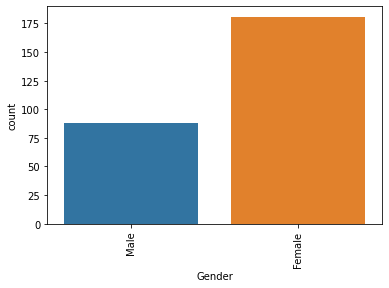

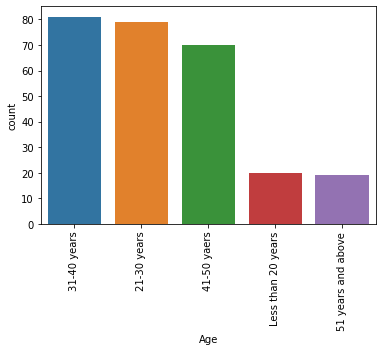

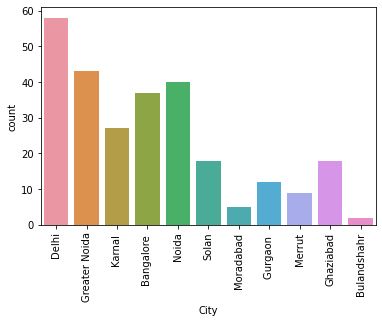

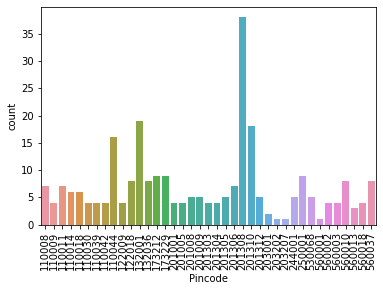

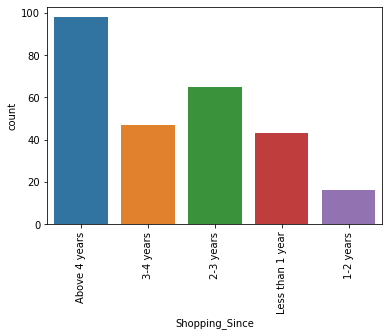

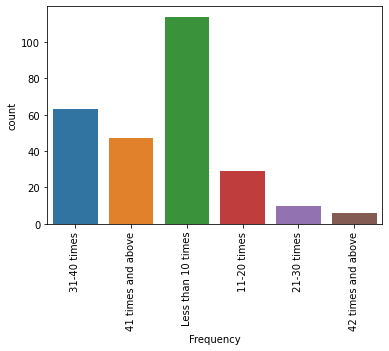

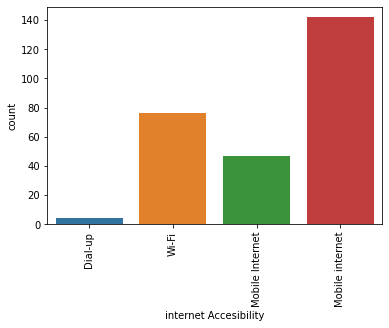

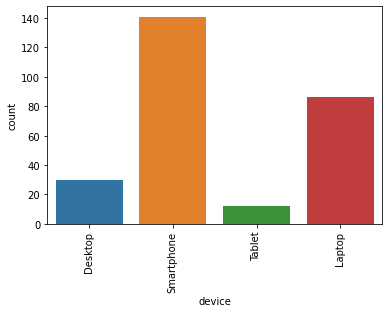

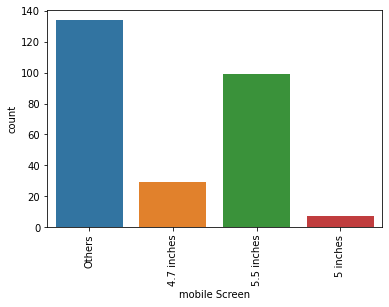

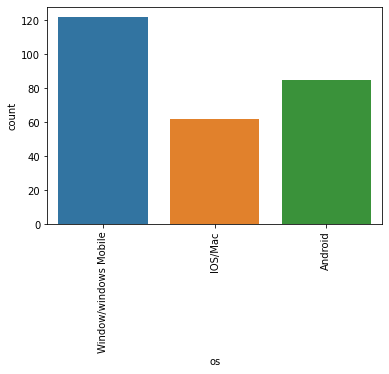

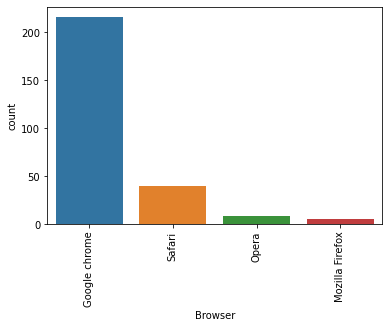

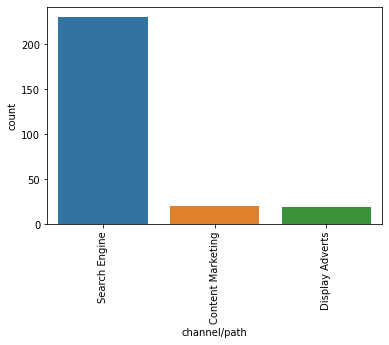

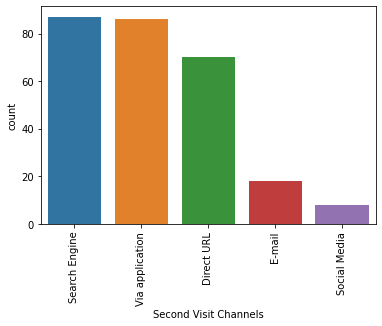

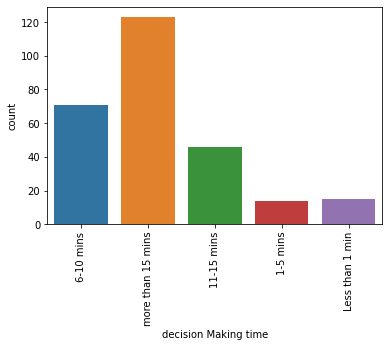

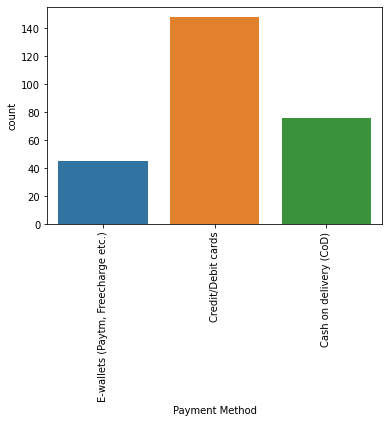

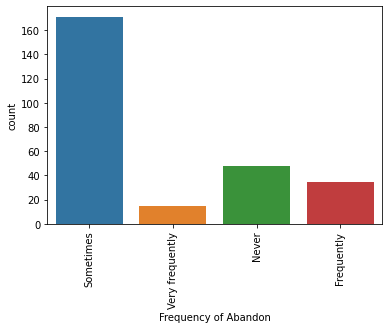

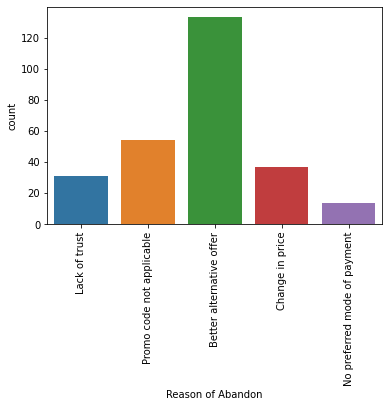

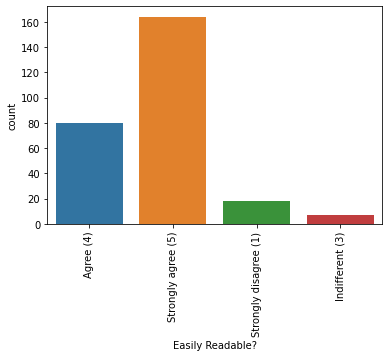

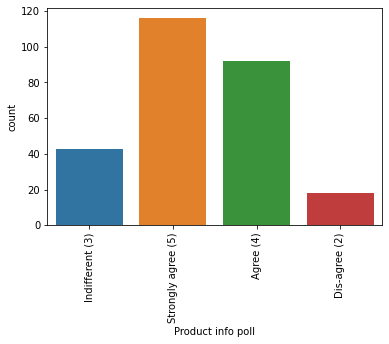

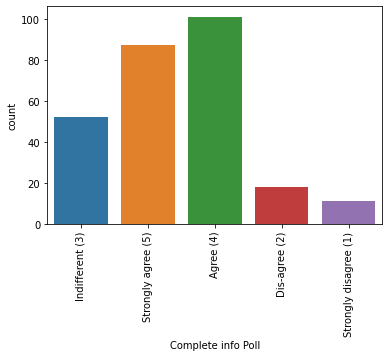

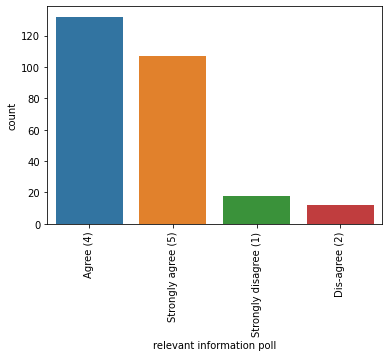

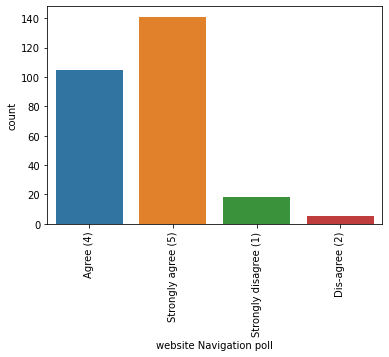

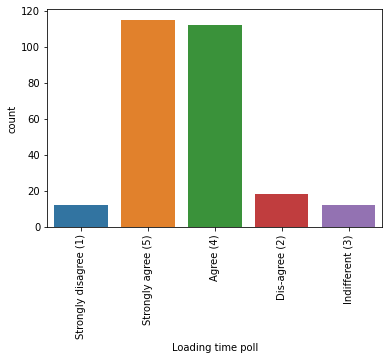

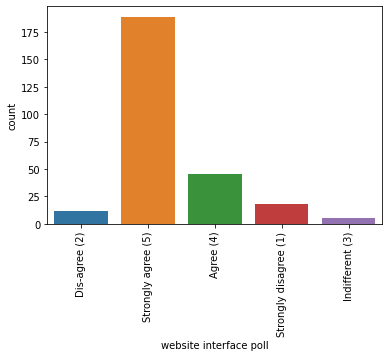

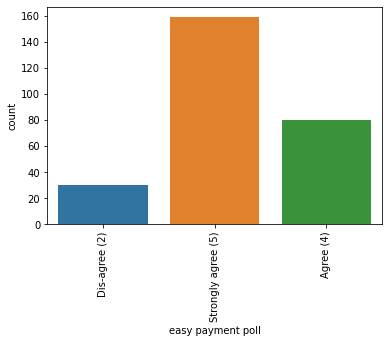

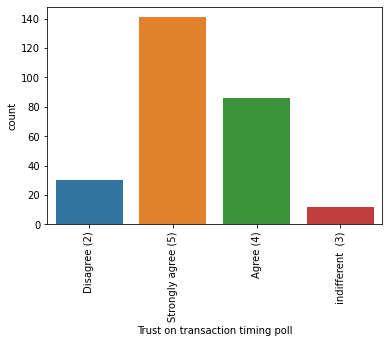

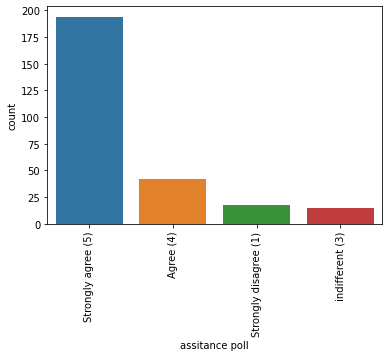

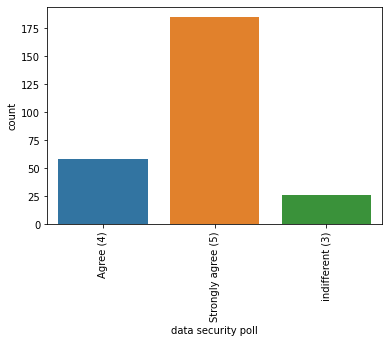

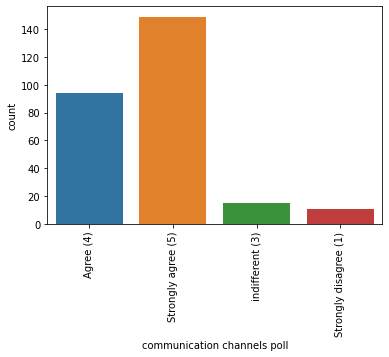

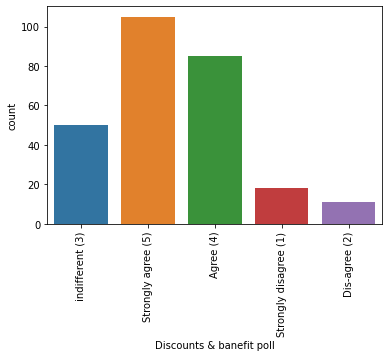

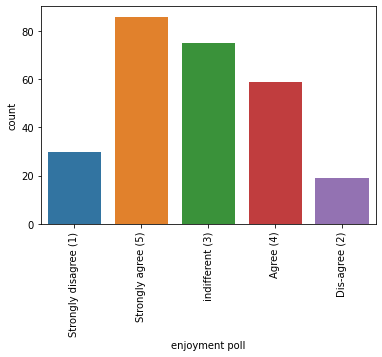

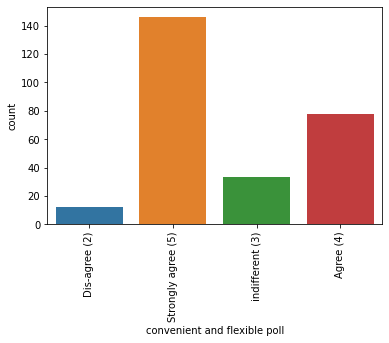

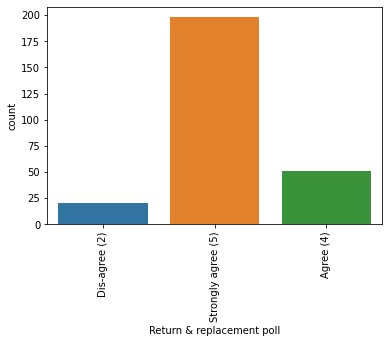

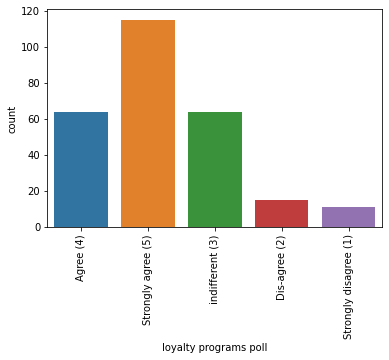

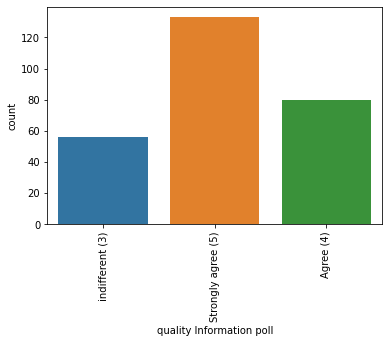

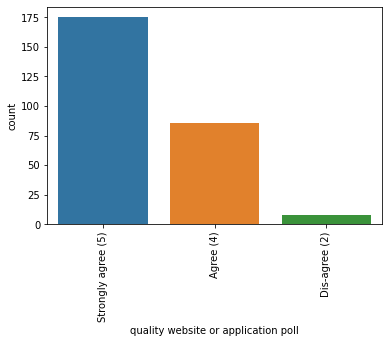

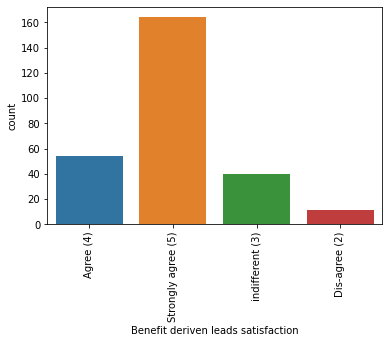

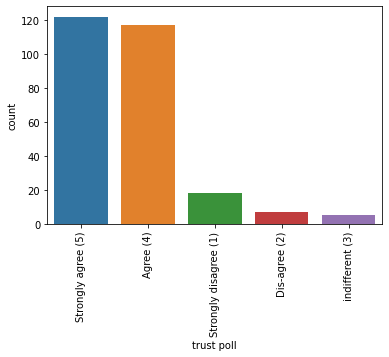

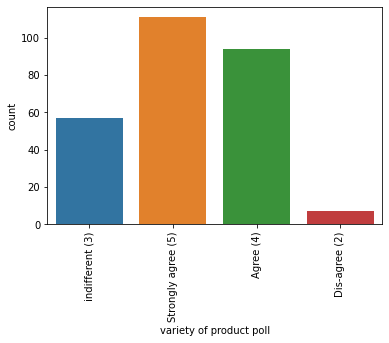

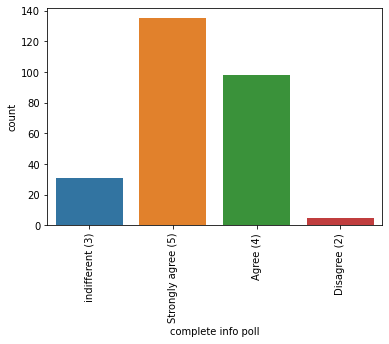

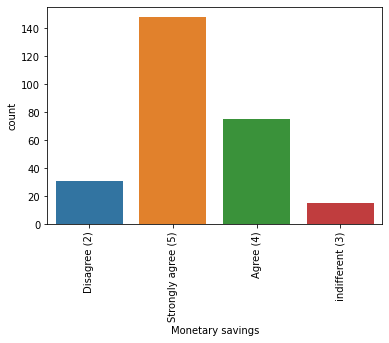

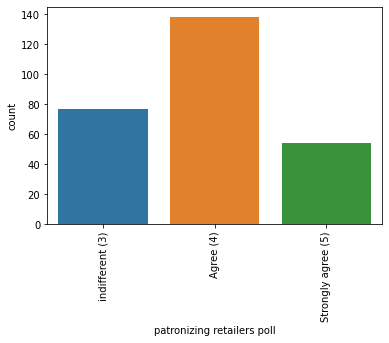

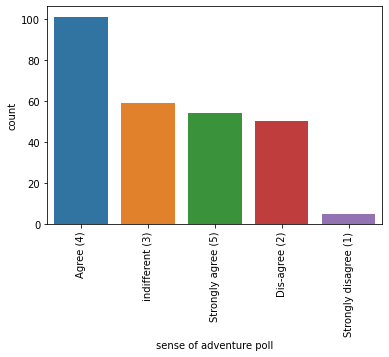

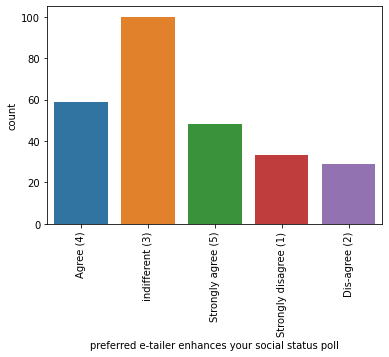

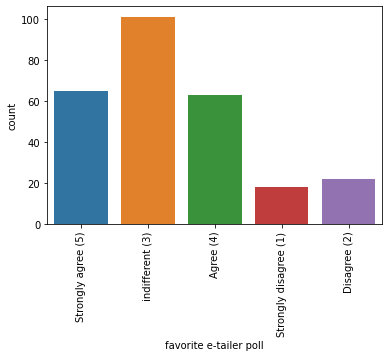

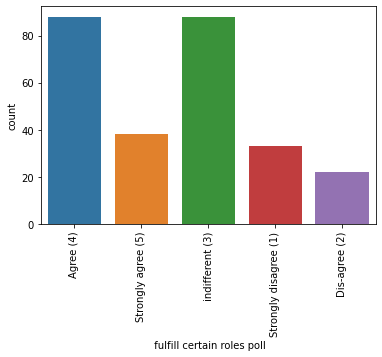

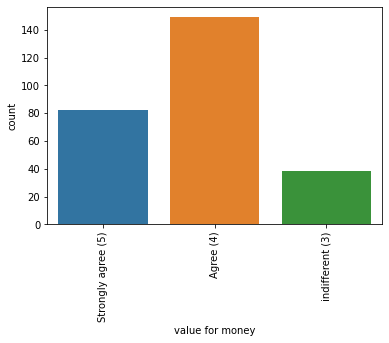

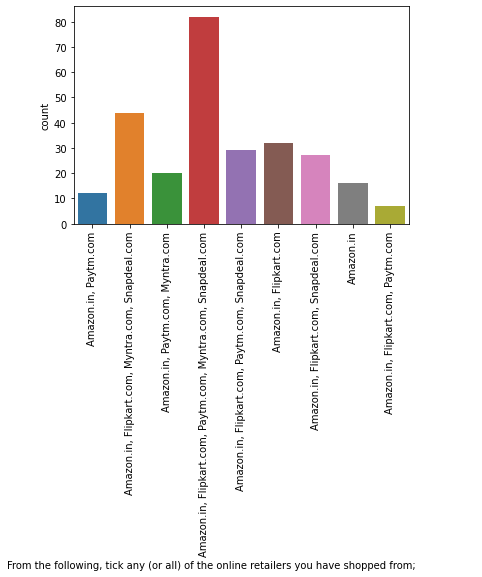

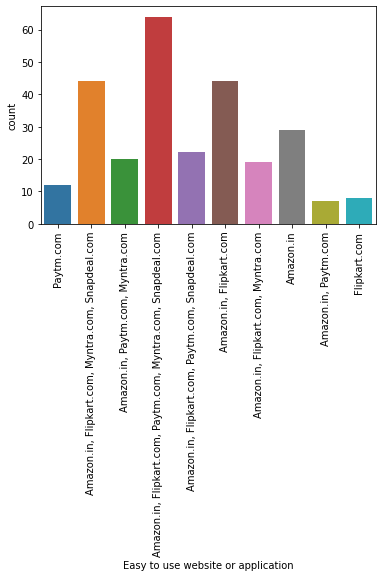

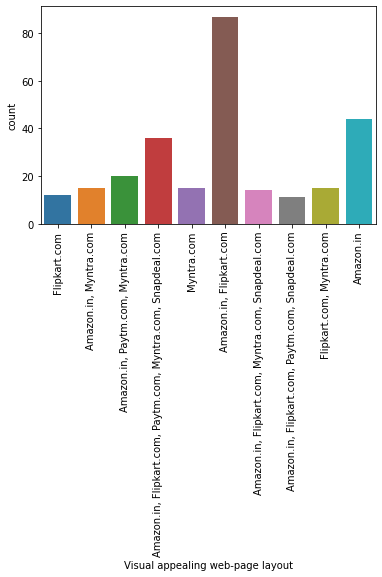

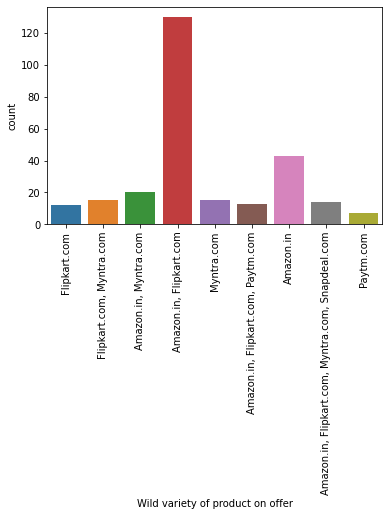

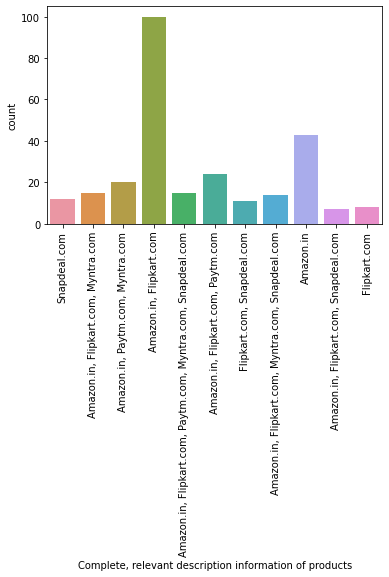

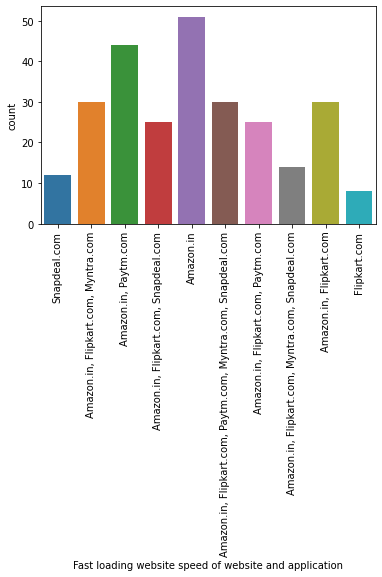

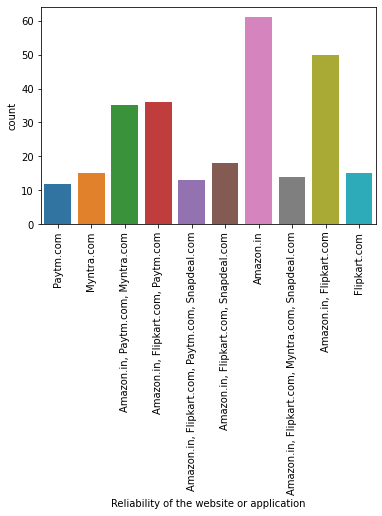

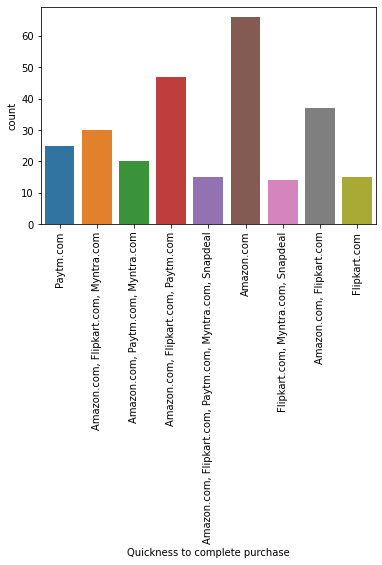

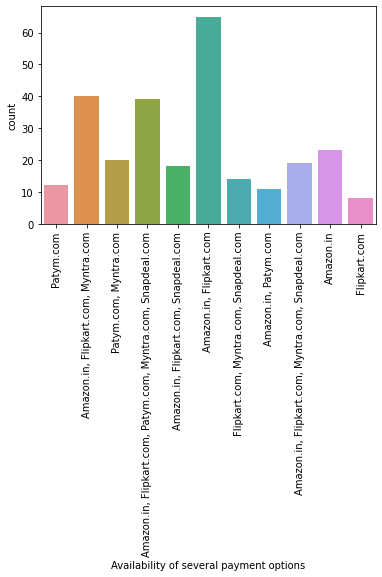

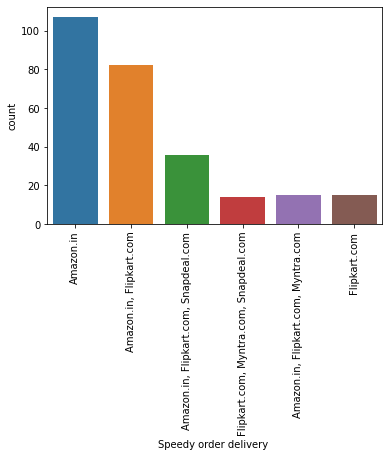

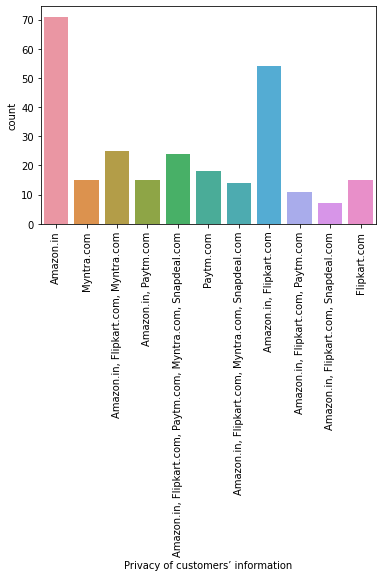

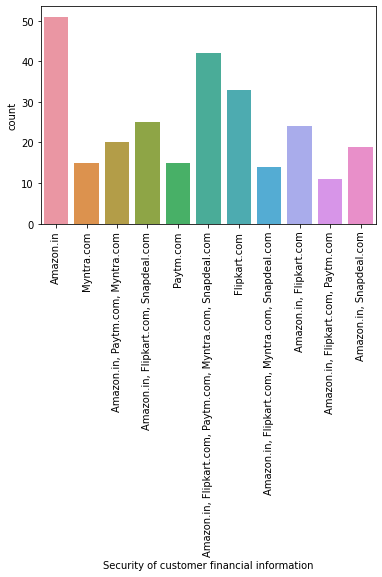

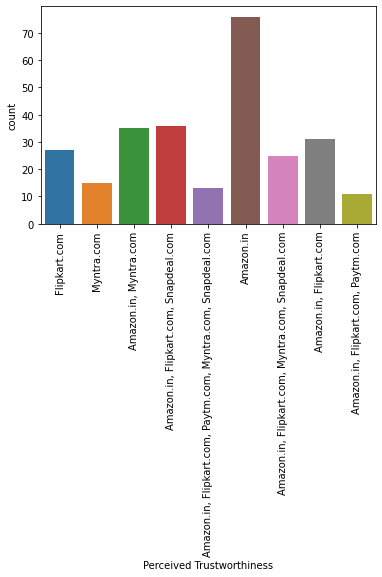

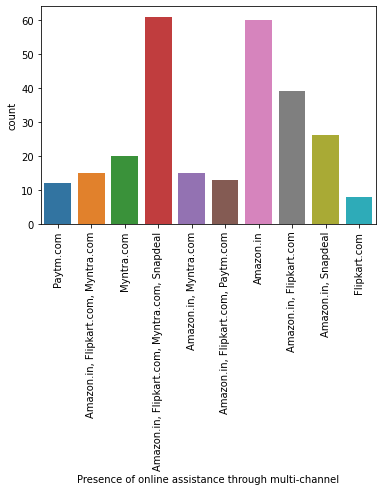

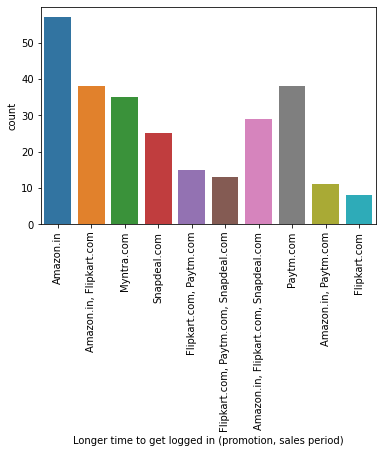

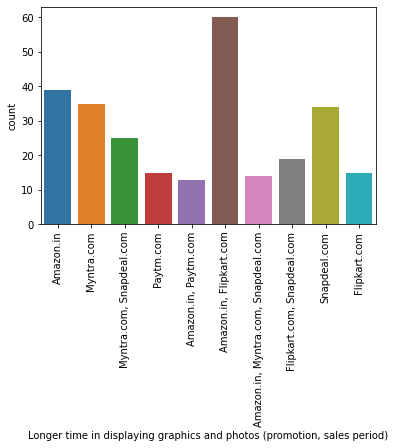

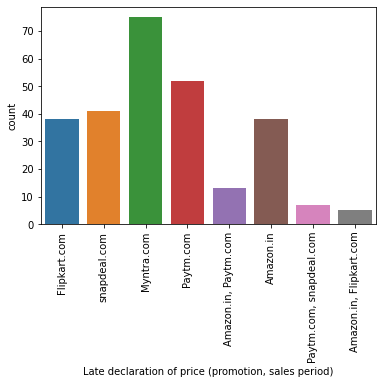

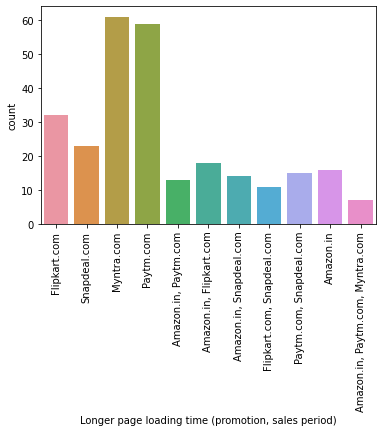

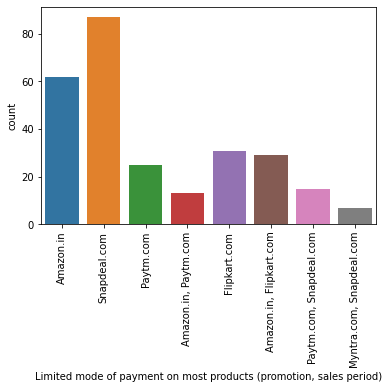

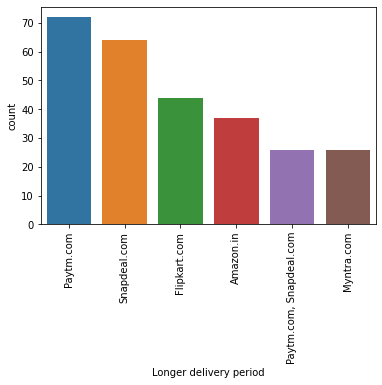

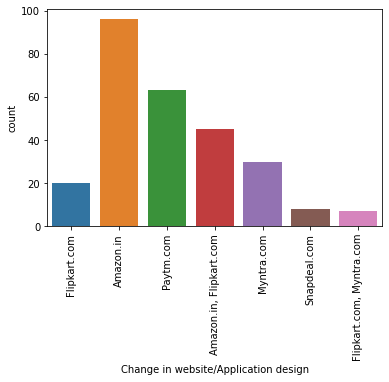

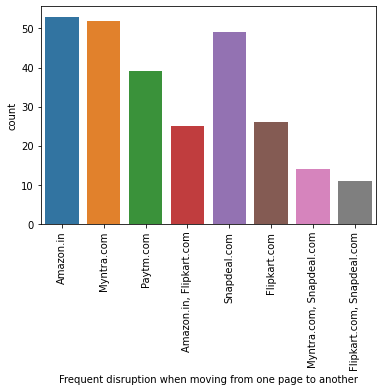

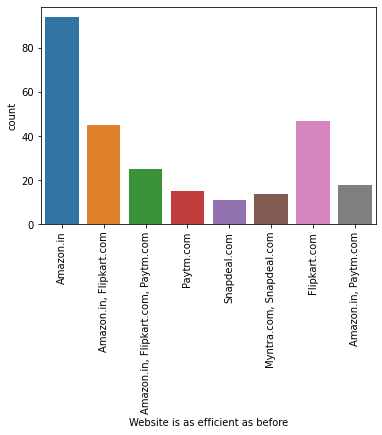

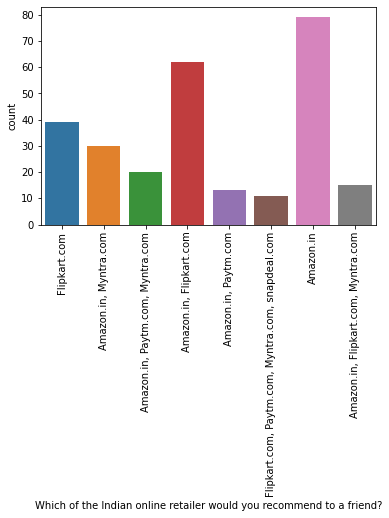

In [9]:
#VISUALIZATION
for i in df.columns:
    sns.countplot(df[i])
    plt.xticks(rotation = 90)
    plt.show()

Observations:

Female count is more than double of male count.(which directly means womens don more online shopping in comparsion to man).coustomer age range between 31-40 years are highest in numbers.31-40 years, 21-30 years & 41-50 years most of the shopping where done by these age groups. people from delhi are most reliable on online shopping. City like delhi greater noida banglore noida having fast moving lifestyle in comparison to cities like Moradabad, Gurgoan, Bulandshair, Merrut as they are reilable on shopping from locals. people living in the area of 201308 (Rampur Jagir, Uttar Pradesh ) are highest in numbers,followed by 201310 (noida)& 132001(karnal). people living in housing societies or in remote area in developed cities are more reilable on online shopping. Coustmer spended above 4 years by ordering online have more retention rate then orders. more coustmer spent time on portal  is directly propotion to more retenstion rate, but the number goes down in between 3-4years. in past 1 year people frequency of doing order less than 10 times is highers than other that directly means more new people are added past year because in the above obersvation we see that people have less time spend have lesser retention rate. Most of the purchases are done on mobile internet & very few where done by dial-ups. people perfer to order from mobile internet are highset in number followed by ordered throgh wifi half appox. People ordering from portable devices like laptop & mobile have high in numbers. as these are giving ease to access then from anywhere. screens other than 4.7 Inches, 5.5 inches or 5 inches have most of the number of customer retention. Most of the people uses window devices for purchasing product online. online order from andrioc devices is higher than the ios or mac. Appoximatly all of the order recevied from google chrome browser, we have only fewer order from browser like safari, morzilla, opera. Most of the first time purchase done by the search engine, display adverts and content marketing have very few purchase rate. Most of the the buyer use search enginesor mobile applictions for their second visit.Buyer spening more than 15 mintues to a product is highest as comapre to buyers who take lesser time to confirm. Most of the people use to do paytm via their cards. Frequency of selecting an items and leaving without making payment the hightest number will agree with doing this sometimes not frequently. The reason by most of the people left the product  without aking payment is getting better offer online on othe portals .Most of the customers like Amazon interms of presence of online assistance through multi-channel followed by flipkart,Myntra and snapdeal. The count is high for the customers who belive that Amazon keeps their financial information secure also the customers trusts flipkart, Myntra, Snapdeal and paytm in terms of keeping thier financial information secured. Most cutomers Strongly agree that it is easy to navigate through the websites. Most customers strongly agree that the website/application loads fast. Most of the customer strongly agree that the website is user friendly, the mode of payment is convenient, and the delivery is done in a timely manner. Most customers Strongly agree that the customer support response, customer privacy, and benifits are high. Myntra and paytm late declaration of price in promotion/sales period compared than others. Myntra and paytm takes longer page loading time. Most customers strongly agree that their replacement policy is good. Most customers strongly agree that the information description is great. Most customers Strongly agree/ agree that they trust the website. Snapdeal.com has limited mode of payment on most products followed by Amazon.in. Paytm and Snapdeal provides late delivery. Most of the customers disliked change in website/Application design on amazon followed by paytm. Most of the customers disliked frequent disruption when moving from one page to another on amazon, Myntra and snapdeal. Most of the customers believes that Amazon and flipkart website is as efficient as before. Most of the customers would like to recommend amazon retailer to a friend followed by flipkart. Customers believes that Amazon and flipkart takes longer time in display the graphics and photos in sales period. Myntra and paytm have late declaration of price in promotion/sales period compared to others. Customers recommend more for Amazon.

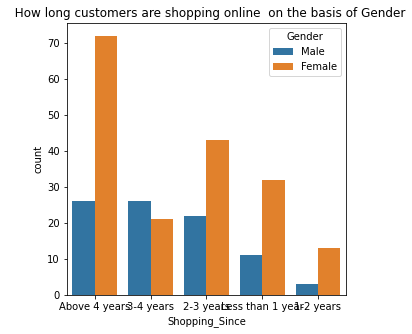

In [11]:
#Bi-Variate Analysis
plt.figure(figsize=[5,5])
plt.title('  How long customers are shopping online  on the basis of Gender')
sns.countplot(df['Shopping_Since'], hue=df['Gender'])
plt.show()

Female customers shop online more than males, and shopping since 4 years and above.

In [13]:
df.columns

Index(['Gender', 'Age', 'City', 'Pincode', 'Shopping_Since', 'Frequency',
       'internet Accesibility', 'device', 'mobile Screen', 'os', 'Browser',
       'channel/path', 'Second Visit Channels', 'decision Making time',
       'Payment Method', 'Frequency of Abandon', 'Reason of Abandon',
       'Easily Readable?', 'Product info poll', 'Complete info Poll',
       'relevant information poll', 'website Navigation poll',
       'Loading time poll', 'website interface poll', 'easy payment poll',
       'Trust on transaction timing poll', 'assitance poll',
       'data security poll', 'communication channels poll',
       'Discounts & banefit poll', 'enjoyment poll',
       'convenient and flexible poll', 'Return & replacement poll',
       'loyalty programs poll', 'quality Information poll',
       'quality website or application poll',
       'Benefit deriven leads satisfaction', 'trust poll',
       'variety of product poll', 'complete info poll', 'Monetary savings',
       'patronizi

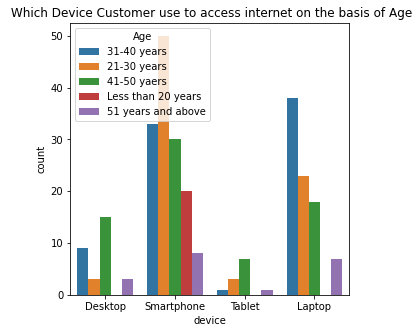

In [14]:
plt.figure(figsize=[5,5])
plt.title(' Which Device Customer use to access internet on the basis of Age')
sns.countplot(df['device'], hue=df['Age'])
plt.show()

21-30 Age group use Smartphone for shopping online followed by 31-40 age group.

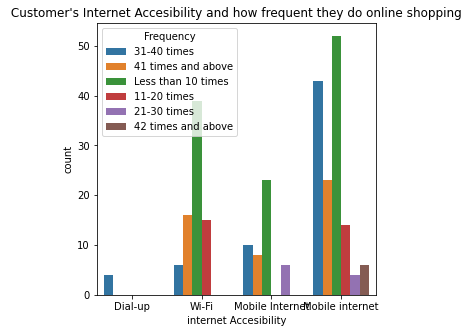

In [15]:
plt.figure(figsize=[5,5])
plt.title(" Customer's Internet Accesibility and how frequent they do online shopping ")
sns.countplot(df['internet Accesibility'], hue=df['Frequency'])
plt.legend(loc='upper left',title='Frequency')
plt.show()

Most of the customers use Mobile Internet to do online shopping and frequecy of most of the customers is less than 10 times in a year

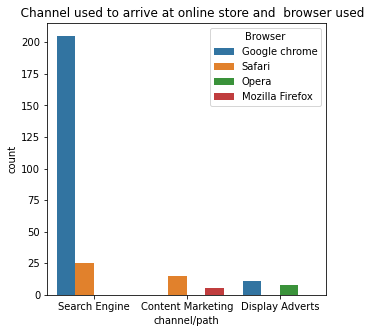

In [19]:
plt.figure(figsize=[5,5])
plt.title("   Channel used to arrive at online store and  browser used")
sns.countplot(df['channel/path'], hue=df['Browser'])
plt.legend(loc='upper right',title='Browser')
plt.show()

Most of the customers used Search Engine as Channel and browser used is Chrome.

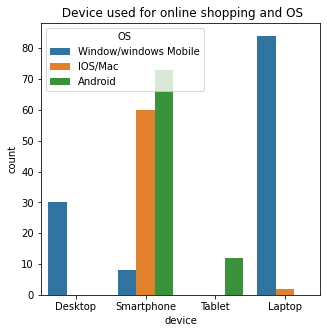

In [21]:
plt.figure(figsize=[5,5])
plt.title(" Device used for online shopping and OS")
sns.countplot(df['device'], hue=df['os'])
plt.legend(loc='upper left',title='OS')
plt.show()

Most of the customers use windows as OS with device laptop.

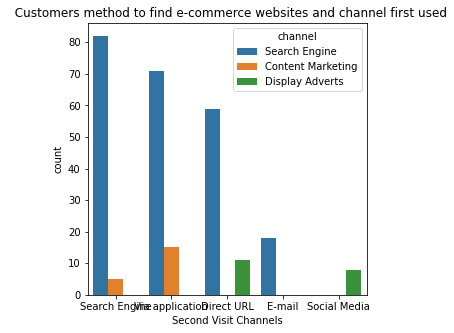

In [23]:
plt.figure(figsize=[5,5])
plt.title("  Customers method to find e-commerce websites and channel first used")
sns.countplot(df['Second Visit Channels'], hue=df['channel/path'])
plt.legend(loc='upper right',title='channel')
plt.show()

Search Engine is the method and Search Engine is the channel first used to arrive at the online retail store.

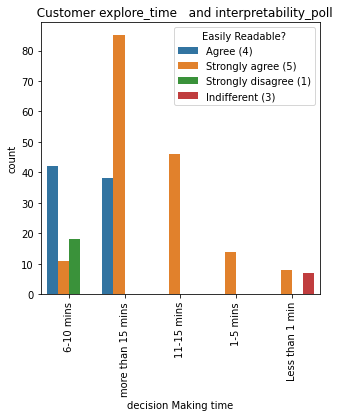

In [26]:
plt.figure(figsize=[5,5])
plt.title("  Customer explore_time   and interpretability_poll")
sns.countplot(df['decision Making time'], hue=df['Easily Readable?'])
plt.legend(loc='upper right',title='Easily Readable?')
plt.show()

Most of the customers explore more than 15 minutes to make a decision and agree that contents on the retailer website is easy to understand.

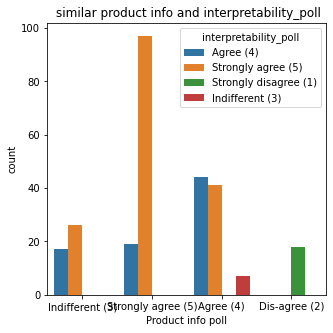

In [27]:
plt.figure(figsize=[5,5])
plt.title(" similar product info and interpretability_poll")
sns.countplot(df['Product info poll'], hue=df['Easily Readable?'])
plt.legend(loc='upper right',title='interpretability_poll')
plt.show()

Customers strongly agree that contents on websites are easy to understand and Information on similar product

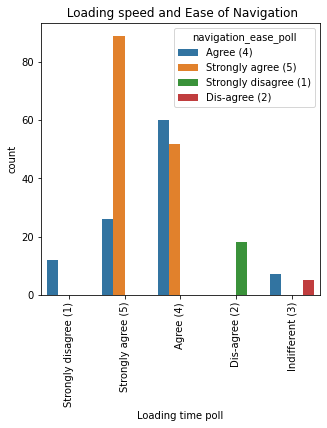

In [31]:
plt.figure(figsize=[5,5])
plt.title(" Loading speed and Ease of Navigation")
sns.countplot(df['Loading time poll'], hue=df['website Navigation poll'])
plt.xticks(rotation=90)
plt.legend(loc='upper right',title='navigation_ease_poll')
plt.show()

Most of the Customers strongly agree that e-commerce websites loading and processing speed and ease in navigation are good.

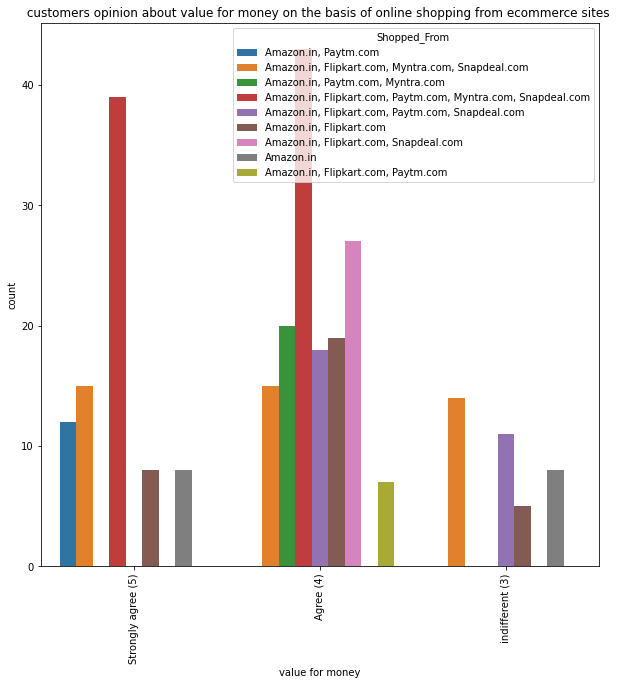

In [33]:
plt.figure(figsize=[10,10])
plt.title(" customers opinion about value for money on the basis of online shopping from ecommerce sites  ")
sns.countplot(df['value for money'], hue=df['From the following, tick any (or all) of the online retailers you have shopped from;                   '])
plt.xticks(rotation=90)
plt.legend(loc='upper right',title='Shopped_From')
plt.show()

More of the customers agree that online shopping from Amazon,Flipkart,Paytm,Myntra and snapdeal offer products which gives value for money.

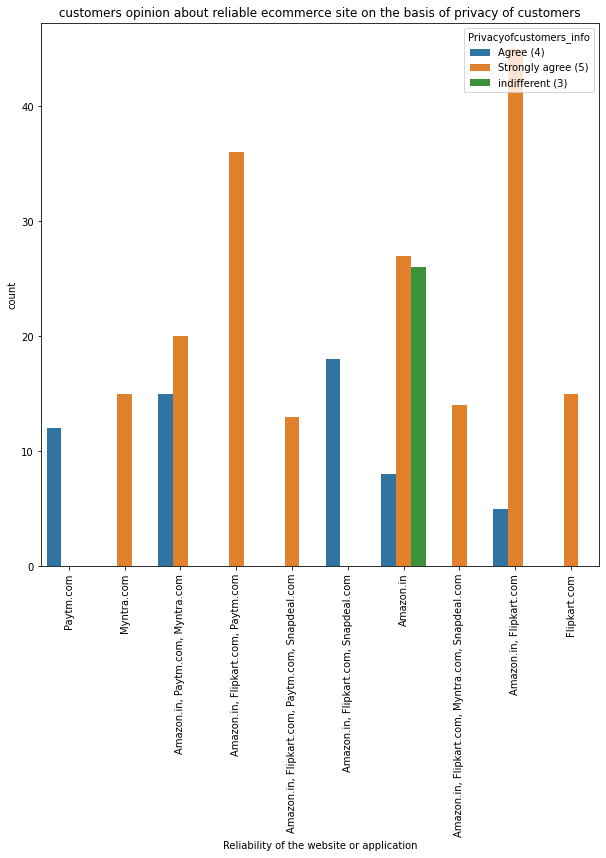

In [34]:
plt.figure(figsize=[10,10])
plt.title(" customers opinion about reliable ecommerce site on the basis of privacy of customers ")
sns.countplot(df['Reliability of the website or application'], hue=df['data security poll'])
plt.xticks(rotation=90)
plt.legend(loc='upper right',title='Privacyofcustomers_info')
plt.show()

Most customers beleive that Amazon and FlipKart are reliable websites,they provide good customer privacy.

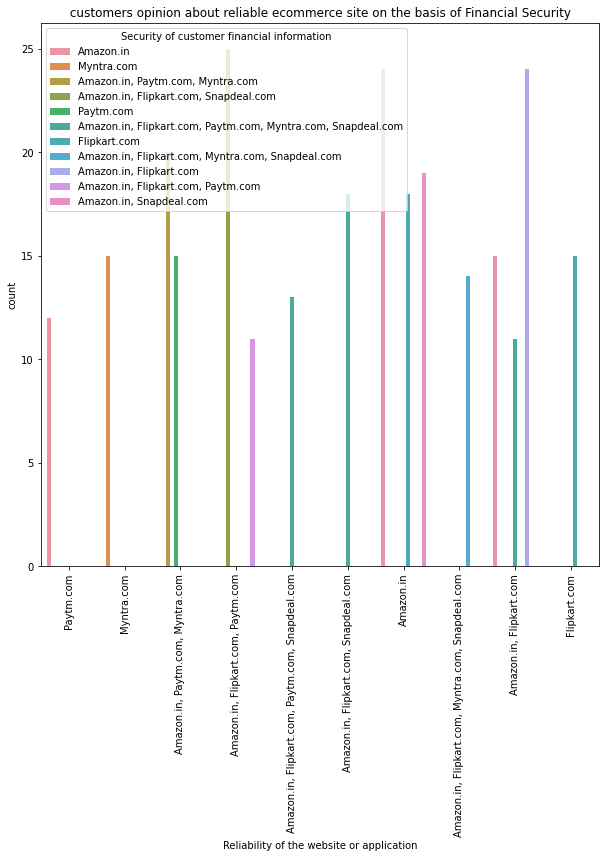

In [36]:
plt.figure(figsize=[10,10])
plt.title(" customers opinion about reliable ecommerce site on the basis of Financial Security ")
sns.countplot(df['Reliability of the website or application'], hue=df['Security of customer financial information'])
plt.xticks(rotation=90)
plt.legend(loc='upper left',title='Security of customer financial information')
plt.show()

Most customers believe that Amazon,paytm and snapdeal provides good financial security.

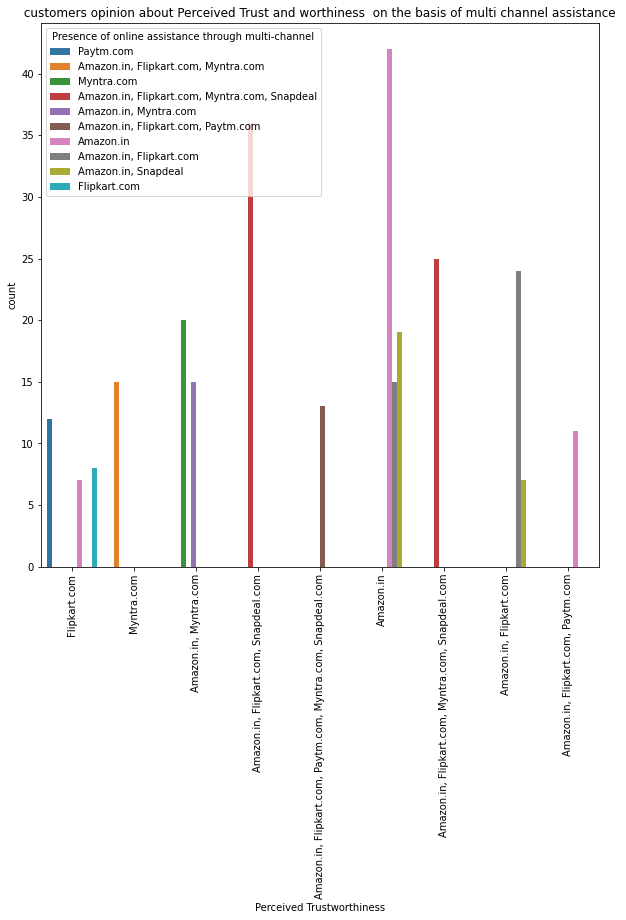

In [38]:
plt.figure(figsize=[10,10])
plt.title(" customers opinion about Perceived Trust and worthiness  on the basis of multi channel assistance ")
sns.countplot(df['Perceived Trustworthiness'], hue=df['Presence of online assistance through multi-channel'])
plt.xticks(rotation=90)
plt.legend(loc='upper left',title='Presence of online assistance through multi-channel')
plt.show()

Amazon has received most of the customers trust by providing multichannel assistance.